In [1]:
import pickle
from strategy import *
from n_and_c_game_dependents import *
from game import *
from n_and_c_params import *

In [2]:
with open("learning_strategies.pkl", "rb") as file:
    strategies = pickle.load(file)
    
strategy_x, strategy_o = strategies
strategy_x.p.learning = False
strategy_o.p.learning = False
strategy_random = RandomStrategy()

In [17]:
N = 10000
x_win = 0
o_win = 0
draw = 0

for _ in range(N):
    game = Game(2, [strategy_x, strategy_random])
#     game = Game(2, [strategy_random, strategy_o])
    game.play(narrate=False, explain=False)
    if game.data.winner == "x":
        x_win += 1
    elif game.data.winner == "o":
        o_win += 1
    else:
        draw += 1

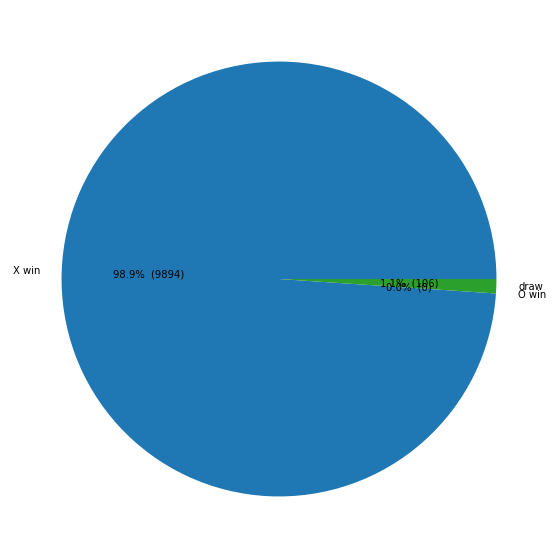

In [18]:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.1f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

fig = plt.figure(figsize=(10, 10))
values = [x_win, o_win, draw]
plt.pie(values, labels=["X win", "O win", "draw"], autopct=make_autopct(values), radius=1)
plt.show()